<a href="https://colab.research.google.com/github/geraldkembellec/ScientificCommitteeAnalytics/blob/master/Adressbuch_nobles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load the pandas library : to play with tables & figures
import pandas as pd
url = 'http://geraldkembellec.scienceontheweb.net/Deutsche_Noblen_in_Paris_im_Jahr_1854-2.csv'
# load a CSV file dataframe
# values separated by "," sign
# data is the name of the dataframe
data = pd.read_csv(url,sep = ';')
# enumerate loaded columns
columns_number=data.shape[1]
# count numbers of nobles
noble_number=data.shape[0]
print("In the 1854 Adressbuch database we found",noble_number,"german nobles in Paris")
print("here you can see a sample of the dataset")
data

In the 1854 Adressbuch database we found 116 german nobles in Paris
here you can see a sample of the dataset


,id,surname,first_name,gender,title,profession_verbatim,occupation_group,de_l_institut,legion_d_honneur,status,military_status
0,587,Mackau von,G.,M,Baron,"Admiral, Senator",Militär,0,Chevalier,Active,Military
1,717,Schramm,G.,M,Graf,"Divisionsgeneral, Senator",Militär,0,Chevalier,Active,Military
2,4110,Kronowski,NaN,M,Graf,Oberstlieutenant,Militär,0,NaN,Active,Military
3,12,Badens von,NaN,F,Gräfin,NaN,Adel,0,NaN,Active,Civil
4,97,Hamel von,NaN,M,Graf,NaN,Adel,0,NaN,Active,Civil
...,...,...,...,...,...,...,...,...,...,...,...
111,3808,Terlecki,NaN,M,Abbe,"Doctor der Medecin u. Theologie, Vorsteher der...",Selbständig,0,NaN,Active,Civil
112,3874,Goschler,NaN,M,Abbe,Director des Collegiums Stanislaus,Selbständig,0,NaN,Active,Civil
113,3914,Jager,NaN,M,Abbe,Professor der Theologie,Selbständig,0,NaN,Active,Civil
114,1275,Ribbentrop von,Adolph,M,Baron,Rentner,Rentner,0,NaN,Pensioner,Civil


## What is the " Légion d'honneur " ?
From the beginning (1802), the Legion of Honor was aimed at __both civilians and soldiers alike__. Napoleon is also credited with the famous sentence : "I want to decorate my soldiers and my scientists".

<a title="David Ll L, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Croix_de_la_Legion_d%27Honneur.svg"><img width="128" alt="Croix de la Legion d&#039;Honneur" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Croix_de_la_Legion_d%27Honneur.svg/128px-Croix_de_la_Legion_d%27Honneur.svg.png"></a>


In [2]:
# I ask the notebook to install something to enable 
# semantic communication with dbpedia
# the query langage is SPARQL
%pip install SPARQLWrapper
from IPython.display import Image
from SPARQLWrapper import SPARQLWrapper, JSON
import urllib.parse

# Specify the DBPedia endpoint
sparql = SPARQLWrapper("http://dbpedia.org/sparql")

# Query for the description of "Legion_of_Honour", filtered by language 
sparql.setQuery("""
PREFIX dbpedia-owl: <http://dbpedia.org/ontology/>              
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>                
SELECT ?label ?comment ?thumbnail
WHERE {                                
  <http://dbpedia.org/resource/Legion_of_Honour> rdfs:label ?label .                
  <http://dbpedia.org/resource/Legion_of_Honour> rdfs:comment ?comment .                               
  <http://dbpedia.org/resource/Legion_of_Honour> dbpedia-owl:thumbnail ?thumbnail .   
FILTER (LANG(?label)='en' AND LANG(?comment)='en')                              
}  
""")

# Convert results to JSON format
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

for hit in result["results"]["bindings"]:
  abstract=hit["comment"]["value"]
  pic=hit["thumbnail"]["value"]
  print(pic)
  print(abstract)

encoded_pic = urllib.parse.quote(pic)
#display(Image(filename=encoded_pic))
#print(encoded_pic)
# --> Unfortunatelly it contains wrong charaters i.e. "é" or " ' ", so the image URL is not usable

     |████████████████████████████████| 376 kB 11.0 MB/s 
     |████████████████████████████████| 45 kB 4.2 MB/s 
http://commons.wikimedia.org/wiki/Special:FilePath/Chevalier_légion_d'honneur_2.png?width=300
The Legion of Honour is the highest French order of merit, both military and civil. Established in 1802 by Napoleon Bonaparte, it has been retained by all later French governments and régimes. The order's motto is Honneur et Patrie ("Honour and Fatherland"), and its seat is the Palais de la Légion d'Honneur next to the Musée d'Orsay, on the left bank of the Seine in Paris. The order is divided into five degrees of increasing distinction: Chevalier (Knight), Officier (Officer), Commandeur (Commander), Grand officier (Grand Officer), and Grand-croix (Grand Cross).


In [ ]:
#print(data.loc[(data['Beruf_Kategorie']==job),:])
number_chevaliers=data.value_counts(data['legion_d_honneur']=="Chevalier")
number_officiers=data.value_counts(data['legion_d_honneur']=="Officier")
number_grand_officiers=data.value_counts(data['legion_d_honneur']=="Grand Officier")
number_grand_croix=data.value_counts(data['legion_d_honneur']=="Grand-Croix")
print("In the dataset of noble German in Paris in 1854, dealing with 'la Légion d'honneur':")
print("-",number_chevaliers.values[1],"had the 'chevalier' grade")
print("-",number_officiers.values[1],"had the 'officier' grade")
print("-",number_grand_officiers.values[1],"had 'grand officier' grade") 
print("- and none had 'Commander' or 'Grand-Croix' grade")

In the dataset of noble German in Paris in 1854, dealing with 'la Légion d'honneur':
- 13 had the 'chevalier' grade
- 2 had the 'officier' grade
- 1 had 'grand officier' grade
- and none had 'Commander' or 'Grand-Croix' grade


In [ ]:
# i is a counter for nobles without "Légion d'honneur"
i=0
ldh_noble = []
decorations = []
for monindex, ligne in data.iterrows():
  # move "von" before the familly name
  chaine = ligne["surname"]
  chaine2=chaine.replace(" von", "")
  familly_name="von "+chaine2
  taille_legion=len(str(ligne["legion_d_honneur"]))
  if taille_legion > 3:
    #print("chiffre sensé être > 3 : ",taille_legion)
    taille_firstname = len(str(ligne["first_name"]))
    decorations.append(ligne["legion_d_honneur"])
    # 3 is the size for NaN type 
    if taille_firstname == 3:
      print(ligne["title"]+" "+familly_name+", "+ligne["military_status"]+", "+ligne["legion_d_honneur"])
      current = { "id":ligne["id"],"first_name=":"Unknown","legion_grade":ligne["legion_d_honneur"]}
    else:
      print(ligne["title"]+" "+familly_name+", "+ligne["first_name"]+", "+ligne["military_status"]+", "+ligne["legion_d_honneur"])
      current = { "id":ligne["id"],"first_name=":ligne["first_name"],"legion_grade":ligne["legion_d_honneur"]}
  else:
    i=i+1
  ldh_noble.append(current)
#print(ldh_noble)
#print(decorations)
nb_lgh=i
print("There were",nb_lgh,"nobles without 'Légion d'honneur' on the population of",noble_number)

Baron von Mackau, G., Military, Chevalier
Graf von Schramm, G., Military, Chevalier
General Graf von Ordener, G. O., Civil, Chevalier
Graf Miglied des Instituts von Pradel, O., Civil, Chevalier
Graf von Nieuwerkerke, Civil, Officier
Baron von Billing, C., Civil, Chevalier
Graf von Fezensac, Civil, Chevalier
Graf von Lövenhielm, G. O., Civil, Chevalier
Baron von Wolbock, Civil, Chevalier
Herzog von Elchingen, O., Civil, Chevalier
Baron von Rothschild, Salomon, Civil, Grand Officier
Graf von Tascher, O., Civil, Chevalier
Baron von Rothschild, Joh. G.O., Civil, Chevalier
Baron von Langsdorff, O., Civil, Chevalier
Graf von Nieuwerkerke, Civil, Officier
Baron von Heeckeren, Civil, Chevalier
There were 100 nobles without 'Légion d'honneur' on the population of 116


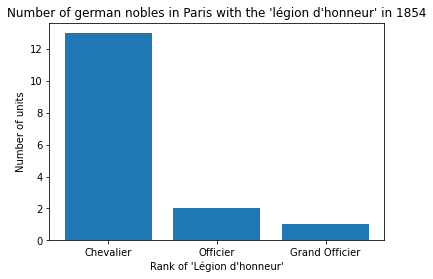

In [ ]:
from matplotlib import pyplot as plt
decorations_list_ldh = ['Chevalier','Officier','Grand Officier']
decorations_count_ldh = [decorations.count('Chevalier'),decorations.count('Officier'),decorations.count('Grand Officier')]
plt.bar(decorations_list_ldh,decorations_count_ldh)
plt.title("Number of german nobles in Paris with the 'légion d'honneur' in 1854")
plt.xlabel("Rank of 'Légion d'honneur'")
plt.ylabel("Number of units")
plt.show()

In [ ]:
percent_of_nobles_with_lgh= noble_number / 100 * nb_lgh
print(str(percent_of_nobles_with_lgh) + "% of noble Germans in Paris in 1854 received one of the 'Légion d'honneur' distinction")

18.56% of noble Germans in Paris in 1854 received one of the 'Légion d'honneur' distinction


In [ ]:
# pas fou
soldier_status=data.value_counts(data['occupation_group']=="Militär")
noble_status=data.value_counts(data['occupation_group']=="Adel")
functionary_status=data.value_counts(data['occupation_group']=="Beamte")
self_employed_status=data.value_counts(data['occupation_group']=="Selbständig")
craftsmen_status=data.value_counts(data['occupation_group']=="Handwerk")
merchants_status=data.value_counts(data['occupation_group']=="Handel")
retired_status=data.value_counts(data['occupation_group']=="Rentner")
annuitant_status=data.value_counts(data['occupation_group']=="Rentier")
print(noble_status[True])
print(soldier_status[True])
print(functionary_status[True])
print(self_employed_status[True])
print(craftsmen_status[True])
print(merchants_status[True])
print(retired_status[True])
print(annuitant_status[True])

89
3
15
4
2
1
1
1


In [ ]:
occupation_nobles = []
for i,ligne in data.iterrows():
  current_occupation = ligne["occupation_group"]
  occupation_nobles.append(current_occupation)
print(occupation_nobles)

['Militär', 'Militär', 'Militär', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Beamte', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Beamte', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Beamte', 'Adel', 'Adel', 'Beamte', 'Adel', 'Adel', 'Beamte', 'Adel', 'Adel', 'Adel', 'Adel', 'Selbständig', 'Adel', 'Adel', 'Adel', 'Beamte', 'Adel', 'Beamte', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Handwerk', 'Adel', 'Adel', 'Beamte', 'Adel', 'Adel', 'Adel', 'Beamte', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Beamte', 'Adel', 'Beamte', 'Handwerk', 'Adel', 'Adel', 'Handel', 'Adel', 'Beamte', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Beamte', 'Adel', 'Beamte', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Beamte', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Adel', 'Selbständig', 'Selbständig', 'Selbständig', 'Rentner',

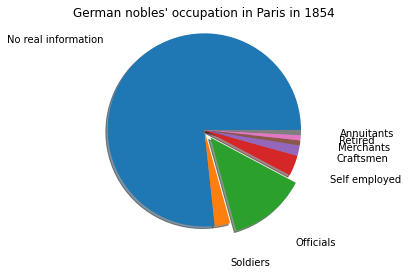

In [ ]:
occupation_list_nobles_status = ['No real information',
                                 'Soldiers',
                                 'Officials',
                                 'Self employed',
                                 'Craftsmen',
                                 'Merchants',
                                 'Retired',
                                 'Annuitants'
                                 ]
occupation_count_list = [occupation_nobles.count('Adel'),
                         occupation_nobles.count('Militär'),
                         occupation_nobles.count('Beamte'),
                         occupation_nobles.count('Selbständig'),
                         occupation_nobles.count('Handwerk'),
                         occupation_nobles.count('Handel'),
                         occupation_nobles.count('Rentner'),
                         occupation_nobles.count('Rentier')
                         ]
labels = occupation_list_nobles_status
sizes = occupation_count_list
explode = (0, 0, 0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice:'officials' 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, labeldistance = 1.4)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("German nobles' occupation in Paris in 1854")
plt.show()

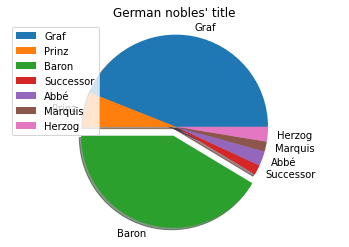

In [ ]:
title_nobles = []
for i,ligne in data.iterrows():
  current_title = ligne['title']
  if 'Graf' in current_title:
    title_nobles.append('Graf or Gräfin')
    #print('Graf or Gräfin')
  elif ('Gräfin' in current_title):
    title_nobles.append('Graf or Gräfin')
  elif 'Prinz' in current_title:
    title_nobles.append('Prinz or Prinzessin')
    #print('Prinz or Prinzessin')
  elif 'Baron' in current_title:
    title_nobles.append('Baron or Baronnin')
    #print('Baron or Baronnin')
  elif 'Nachfolger' in current_title:
    #print('Successor')
    title_nobles.append('Successor')
  elif 'Abbe' in current_title:
    #print('Abbe')
    title_nobles.append('Abbe')
  elif 'Marquis' in current_title:
    #print('Marquis or Marquise')
    title_nobles.append('Marquis or Marquise')
  elif 'Herzog' in current_title:
    #print("Herzog or Herzogin")
    title_nobles.append('Herzog or Herzogin')
  else:
    title_nobles.append(current_title)
    print("hum : "+current_title)
#print(title_nobles)
nobles_status=['Graf',
               'Prinz',
               'Baron',
               'Successor',
               'Abbé',
               'Marquis',
               'Herzog'
              ]
nobles_status_list = [
                      title_nobles.count('Graf or Gräfin'),
                      title_nobles.count('Prinz or Prinzessin'),
                      title_nobles.count('Baron or Baronnin'),
                      title_nobles.count('Successor'),
                      title_nobles.count('Abbe'),
                      title_nobles.count('Marquis or Marquise'),
                      title_nobles.count('Herzog or Herzogin'),
                      ]
#print(nobles_status_list)
labels = nobles_status
sizes = nobles_status_list
fig1, ax1 = plt.subplots()
explode = (0, 0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice 
ax1.pie(sizes, explode=explode,labels=labels,shadow=True, labeldistance = 1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("German nobles' title")
plt.legend()
plt.show()
